In [1]:
import pandas as pd
import numpy as np
import prepare as prep
import explore as ex

# Project Description:  
Board games are loved by everyone, young and old. They are something that brings people together for countless hours of social lesiure. The only thing better than the time spent with friends and family is enjoying the game you are playing while doing it. With so many choices and competition in the industry, how can a company produce an enjoyable game and become a favorite of those who play it? The board game industry has produced such games before, but what if there was a recipe for creating a board game that people will love? In 2022 the board game market was worth about $3.13 billion. With that much money being spent for board games, I will be using data to see if there is a popular commonality among highly rated board games and develop a recipe of features to build the next top rated board game.

# Project Goals:  
* Identify drivers of highly rated board games
* Build a model to accurately predict if a board game will have achieve a high rating.
* Conduct an NLP analysis for game descriptions and mechanics
* Provide stakeholders with a recipe to create a highly rated board game.

# Executive Summary:
1. There were no features found that indicate if a board game would rank high (top 10%) other than number of distributors.
2. There were some mechanics in the top 10% of board games that are not in the top mechanics of other board games.
3. The Descriptions of the games indicate that there may be a certain set of elements in a board game that are more popular.

| Feature | Definition |
|:--------|:-----------|
|id| The id number of the game|
|name| The name of the game|
|price| The lowest current available price for the game|
|msrp| Manufacturer suggested retail price|
|year_published| The year the game was made|
|min_players| Minimum number of players required to play the game|
|max_players| The maximum number of players that can play the game|
|min_playtime| The manufacturers estimated minimum time to play the game|
|max_playtime| The manufacturers estimated maximum time to play the game|
|min_age| The recommended minimum age required to play the game|
|num_user_ratings| The number of user ratings the game has recieved on boardgameatlas|
|average_user_rating| The average rating (1-5) the game has recieved from the users|
|num_user_complexity_votes| The average rating (1-5) of the games complexity as rated by the users|
|average_learning_complexity| The average rating (1-5) of the games learning complexity as rated by the users|
|average_strategy_complexity| PThe average rating (1-5) of the games strategy complexity as rated by the users|
|rank| The rank of the game|
|type| Either 'game', 'expansion', or 'accessory' indicating the type of product|
|num_distributors| The number of distributors of the game|

# Prepare

In [2]:
# a brief look at the data
df=prep.explore_df()
df.head(3)

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
0,TAAifFP590,Root,45.00,60.0,2018.0,2.0,4.0,60.0,90.0,10.0,412,4.059395,11,3.818182,3.636364,1,game,6
1,yqR4PtpO8X,Scythe,54.39,90.0,2016.0,1.0,5.0,90.0,120.0,14.0,763,4.213439,17,3.117647,3.235294,2,game,9
2,5H5JS0KLzK,Wingspan,50.00,60.0,2019.0,1.0,5.0,40.0,70.0,10.0,589,4.162919,12,2.500000,2.833333,3,game,11


## Data preperation for exploration:
* The top 10% of games will be considered "high rated" games
* The 'type' column was encoded into a 0, 1, or 2 for 'game', 'expansion', and 'accessory' respectively

In [3]:
# data prepared for exploration
df=ex.explore_data()

In [4]:
# data split into train, validate, and test. Stratified on 'rank'
train, val, test = ex.tts(df, 'rank')
train.shape, val.shape, test.shape

((716, 18), (179, 18), (100, 18))

# Explore

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the num_distributors of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average num_distributors of higher rated games and other games</dd>
        <dd>- $H_a$: The average num_distributors of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

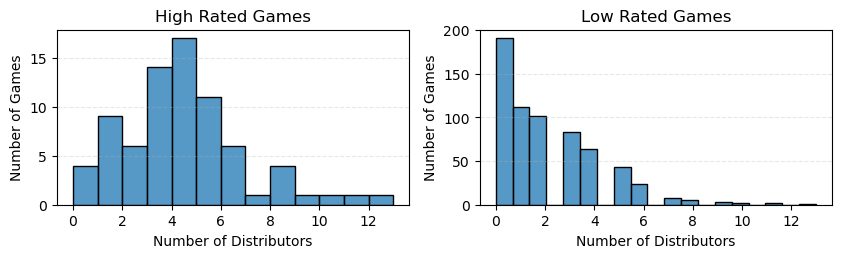

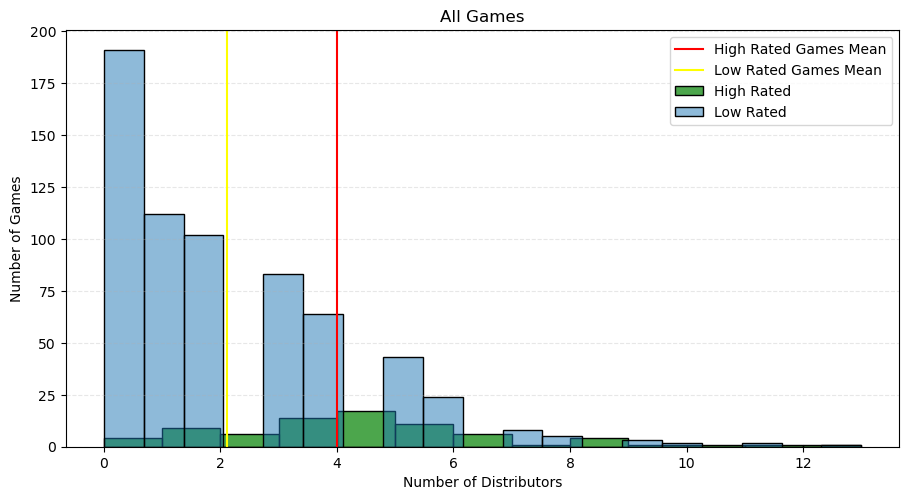

In [6]:
ex.q9_plots(train)

In [7]:
ex.q9_statistic(train)

The p-value (1.5364921060137039e-12) is lower than the alpha (0.05) so we reject the null hypothesis.


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>What are the top mechanics among high rated games and low rated games?</dt>
    </dl>
</div>

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>When exploring the game descriptions:</dt>
        <dd>- What are the top <strong>bigrams</strong> of high and low rated games?</dd>
        <dd>- What are the top <strong>trigrams</strong> of high and low rated games?</dd>
    </dl>
</div>